# Evidence of chaos in numerical simulations

Chaotic trajectories differ from quasi-periodic trajectories. Because of the stronger perturbation they are subject to, chaotic trajectories explore wide areas of the parameter space (they 'diffuse' in the phase space). 

There are two features that characterise chaotic trajectories: 
+ Their evolution is 'random-like', with abrupt changes in the temporal evolution. As a result, the orbital elements evolve in a disordered way. 
+ They are very sensitive to the initial conditions. As a result, chaotic trajectories are unpredictable. 

In this notebook, you are asked to put in evidence the chaotic behaviour of well-chosen planetary systems' configurations. 
Start from the stability map of HD202206, and analyse the behaviour of diverse system's configurations. 

Select a configuration in: 
+ A chaotic zone of the map. 
+ A non chaotic (quasi-periodic) zone of the map - choose the middle of the 5:1 MMR. 

For each configuration, integrate 2 systems over 10kyr: the original one, and a 'shadow' system that differs from the former by a small shift initially applied to one of its orbital elements. 
Therefore, for each configuration you integrate two systems. 

For each zone of the map (chaotic and quasi-periodic), you will then look at the temporal evolution of the difference between the original configuration and its shadow. 

Note: I use here below the REBOUND package, and the associated symplectic integrator 'whfast'. Feel free to use the integrator of your choice. 

Note 2: It is always good to look at the precision of an integration before using its results! How would you proceed? 

In [1]:
# Import the necessary libraries 
# ------------------------------
import math 
import numpy as np
from matplotlib import pyplot as plt

# If you use the REBOUND package to integrate the equations of motion, you need the following line: 
import rebound 
# Installation instructions at https://rebound.readthedocs.io/en/latest/quickstart_installation/ 

In [2]:
# Numerical integrations: Quasi-periodic doublet of configurations
# ----------------------  ----------------------------------------
NBpl = int(2) 
mstar =  1.1198
mEarth = 3.986004e14 / 1.3271244e20 # mEarth expressed in mSun

a_b = 0.8241
lambda_b = 2.615969296059181  # REBOUND uses angles in radians, in [-pi;pi] 
e_b = 0.42862 
w_b = 2.8320585107485985 # REBOUND uses angles in radians, in [-pi;pi] 
i_b = 0.0
O_b = 0.0
m_b = 0.016500 # In mSun

a_c =  2.2462336037728994 
lambda_c = -2.2088887013240233
e_c = 0.2
w_c = 1.7917550100973787 
i_c = 0.0 
O_c = 0.0 
m_c = 0.002585 # In mSun

Shadow_lambda_c = lambda_c + (0.1 * math.pi/180.) # Shift of 0.1 deg on lambda_c


# Original configuration 
# ++++++++++++++++++++++
print('No Chaos: Integrate the original configuration')
sim = rebound.Simulation() 
sim.add(m=mstar) 
sim.add(m=m_b, a=a_b, l=lambda_b, e = e_b, omega=w_b, inc=i_b, Omega=O_b) 
sim.add(primary=sim.particles[0], m=m_c, a=a_c, l=lambda_c, e=e_c, omega=w_c, inc=i_c, Omega=O_c) # Caution: by default, the coordinates are Jacobi. 

sim.move_to_com() # Center of mass reference
dt = 1.0*2*math.pi / 100. # The integration timestep 
sim.dt = dt
Integ_time = int(10000) # The desired integration time, in years 
Nb_outputs = int(20000) # The number of output times desired 
sim.integrator = "whfast" # whfast is a Wisdom-Holman symplectic integrator 

Lambda = np.zeros(NBpl)
ecc = np.zeros(NBpl) 
A = np.zeros(NBpl) 
w = np.zeros(NBpl) 

try:
    output = open('NoChaos_Original.dat','w')
    for j in range(Nb_outputs):
        Nb_steps = int(Integ_time*100 / Nb_outputs)
        t_output = Nb_steps*(j+1)*dt
        sim.integrate(t_output, exact_finish_time=0) # This second argument insures the symplectic nature of the integrator! It forces the integration timestep to be constant. 
        
        for q in range(NBpl):
            Lambda[q] = sim.particles[q+1].l
            ecc[q] = sim.particles[q+1].e
            A[q] = sim.particles[q+1].a
            w[q] = sim.particles[q+1].omega 
        
        output.write("{0:.15e}".format(t_output/(2*math.pi)) + ' ' + "{0:.15e}".format(Lambda[0]) + ' ' + "{0:.15e}".format(ecc[0]) + ' ' + "{0:.15e}".format(A[0]) + ' ' + "{0:.15e}".format(w[0]) + ' ' + "{0:.15e}".format(Lambda[1]) + ' ' + "{0:.15e}".format(ecc[1]) + ' ' + "{0:.15e}".format(A[1]) + ' ' + "{0:.15e}".format(w[1]) + '\n') 
    output.close() 
        
except rebound.Escape:
    escape = open('Exception_NoChaos.dat','a')
    escape.write('Original configuration: Escape!! (Integration time = 10kyr)' + '\n')
    escape.close()

except rebound.Encounter:
    encounter = open('Exception_NoChaos.dat','a')
    encounter.write('Original configuration: Close encounter!! (Integration time = 10kyr)' + '\n')
    encounter.close()
         

# Shadow configuration 
# ++++++++++++++++++++
print('No Chaos: Integrate the shadow configuration')
sim = rebound.Simulation() 
sim.add(m=mstar) 
sim.add(m=m_b, a=a_b, l=lambda_b, e = e_b, omega=w_b, inc=i_b, Omega=O_b) 
sim.add(primary=sim.particles[0], m=m_c, a=a_c, l=Shadow_lambda_c, e=e_c, omega=w_c, inc=i_c, Omega=O_c) # Caution: by default, the coordinates are Jacobi. 

sim.move_to_com() 
dt = 1.0*2*math.pi / 100.
sim.dt = dt
Integ_time = int(10000) # The desired integration time, in years 
Nb_outputs = int(20000) # The number of output times desired 
sim.integrator = "whfast"

Lambda = np.zeros(NBpl)
ecc = np.zeros(NBpl) 
A = np.zeros(NBpl) 
w = np.zeros(NBpl) 

try:
    output = open('NoChaos_Shadow.dat','w')
    Nb_steps = int(Integ_time*100 / Nb_outputs)
    for j in range(Nb_outputs):
        t_output = Nb_steps*(j+1)*dt
        sim.integrate(t_output, exact_finish_time=0) 
        
        for q in range(NBpl):
            Lambda[q] = sim.particles[q+1].l
            ecc[q] = sim.particles[q+1].e
            A[q] = sim.particles[q+1].a
            w[q] = sim.particles[q+1].omega 
        
        output.write("{0:.15e}".format(t_output/(2*math.pi)) + ' ' + "{0:.15e}".format(Lambda[0]) + ' ' + "{0:.15e}".format(ecc[0]) + ' ' + "{0:.15e}".format(A[0]) + ' ' + "{0:.15e}".format(w[0]) + ' ' + "{0:.15e}".format(Lambda[1]) + ' ' + "{0:.15e}".format(ecc[1]) + ' ' + "{0:.15e}".format(A[1]) + ' ' + "{0:.15e}".format(w[1]) + '\n') 
    output.close() 
        
except rebound.Escape:
    escape = open('Exception_NoChaos.dat','a')
    escape.write('Shadow configuration: Escape!! (Integration time = 10kyr)' + '\n')
    escape.close()

except rebound.Encounter:
    encounter = open('Exception_NoChaos.dat','a')
    encounter.write('Shadow configuration: Close encounter!! (Integration time = 10kyr)' + '\n')
    encounter.close()

print('The integrations of the quasi-periodic doublet are done!') 

No Chaos: Integrate the original configuration
No Chaos: Integrate the shadow configuration
The integrations of the quasi-periodic doublet are done!


In [3]:
# Numerical integrations: Chaotic doublet of configurations
# ----------------------  ---------------------------------
NBpl = int(2) 
mstar = 1.1198
mEarth = 3.986004e14 / 1.3271244e20 # mEarth expressed in mSun

a_b =  0.8241
lambda_b = 2.615969296059181 # REBOUND uses angles in radians, in [-pi;pi] 
e_b = 0.42862 
w_b = 2.8320585107485985 # REBOUND uses angles in radians, in [-pi;pi] 
i_b = 0.0 
O_b = 0.0
m_b = 0.016500 # In mSun

a_c = 2.473520286476527
lambda_c = -2.2088887013240233
e_c = 0.35
w_c = 1.7917550100973787
i_c = 0.0 
O_c = 0.0 
m_c =  0.002585 # In mSun

Shadow_lambda_c = lambda_c + (0.1 * math.pi/180.) # Shift of 0.1 deg on lambda_c


# Original configuration 
# ++++++++++++++++++++++
print('Chaos: Integrate the original configuration')
sim = rebound.Simulation() 
sim.add(m=mstar) 
sim.add(m=m_b, a=a_b, l=lambda_b, e = e_b, omega=w_b, inc=i_b, Omega=O_b) 
sim.add(primary=sim.particles[0], m=m_c, a=a_c, l=lambda_c, e=e_c, omega=w_c, inc=i_c, Omega=O_c) # Caution: by default, the coordinates are Jacobi. 

sim.move_to_com() 
dt = 1.0*2*math.pi / 100. # The integration timestep 
sim.dt = dt
Integ_time = int(10000) # The desired integration time, in years 
Nb_outputs = int(20000) # The number of output times desired 
sim.integrator = "whfast" # whfast is a Wisdom-Holman symplectic integrator 

Lambda = np.zeros(NBpl)
ecc = np.zeros(NBpl) 
A = np.zeros(NBpl) 
w = np.zeros(NBpl) 

try:
    output = open('Chaos_Original.dat','w')
    for j in range(Nb_outputs):
        Nb_steps = int(Integ_time*100 / Nb_outputs)
        t_output = Nb_steps*(j+1)*dt
        sim.integrate(t_output, exact_finish_time=0) # This second argument insures the symplectic nature of the integrator! It forces the integration timestep to be constant. 
        
        for q in range(NBpl):
            Lambda[q] = sim.particles[q+1].l
            ecc[q] = sim.particles[q+1].e
            A[q] = sim.particles[q+1].a
            w[q] = sim.particles[q+1].omega 
        
        output.write("{0:.15e}".format(t_output/(2*math.pi)) + ' ' + "{0:.15e}".format(Lambda[0]) + ' ' + "{0:.15e}".format(ecc[0]) + ' ' + "{0:.15e}".format(A[0]) + ' ' + "{0:.15e}".format(w[0]) + ' ' + "{0:.15e}".format(Lambda[1]) + ' ' + "{0:.15e}".format(ecc[1]) + ' ' + "{0:.15e}".format(A[1]) + ' ' + "{0:.15e}".format(w[1]) + '\n') 
    output.close() 
        
except rebound.Escape:
    escape = open('Exception_Chaos.dat','a')
    escape.write('Original configuration: Escape!! (Integration time = 10kyr)' + '\n')
    escape.close()

except rebound.Encounter:
    encounter = open('Exception_Chaos.dat','a')
    encounter.write('Original configuration: Close encounter!! (Integration time = 10kyr)' + '\n')
    encounter.close()
         

# Shadow configuration 
# ++++++++++++++++++++
print('Chaos: Integrate the shadow configuration')
sim = rebound.Simulation() 
sim.add(m=mstar) 
sim.add(m=m_b, a=a_b, l=lambda_b, e = e_b, omega=w_b, inc=i_b, Omega=O_b) 
sim.add(primary=sim.particles[0], m=m_c, a=a_c, l=Shadow_lambda_c, e=e_c, omega=w_c, inc=i_c, Omega=O_c) # Caution: by default, the coordinates are Jacobi. 

sim.move_to_com() 
dt = 1.0*2*math.pi / 100.
sim.dt = dt
Integ_time = int(10000) # The desired integration time, in years 
Nb_outputs = int(20000) # The number of output times desired 
sim.integrator = "whfast"

Lambda = np.zeros(NBpl)
ecc = np.zeros(NBpl) 
A = np.zeros(NBpl) 
w = np.zeros(NBpl) 

try:
    output = open('Chaos_Shadow.dat','w')
    Nb_steps = int(Integ_time*100 / Nb_outputs)
    for j in range(Nb_outputs):
        t_output = Nb_steps*(j+1)*dt
        sim.integrate(t_output, exact_finish_time=0) 
        
        for q in range(NBpl):
            Lambda[q] = sim.particles[q+1].l
            ecc[q] = sim.particles[q+1].e
            A[q] = sim.particles[q+1].a
            w[q] = sim.particles[q+1].omega 
        
        output.write("{0:.15e}".format(t_output/(2*math.pi)) + ' ' + "{0:.15e}".format(Lambda[0]) + ' ' + "{0:.15e}".format(ecc[0]) + ' ' + "{0:.15e}".format(A[0]) + ' ' + "{0:.15e}".format(w[0]) + ' ' + "{0:.15e}".format(Lambda[1]) + ' ' + "{0:.15e}".format(ecc[1]) + ' ' + "{0:.15e}".format(A[1]) + ' ' + "{0:.15e}".format(w[1]) + '\n') 
    output.close() 
        
except rebound.Escape:
    escape = open('Exception_Chaos.dat','a')
    escape.write('Shadow configuration: Escape!! (Integration time = 10kyr)' + '\n')
    escape.close()

except rebound.Encounter:
    encounter = open('Exception_Chaos.dat','a')
    encounter.write('Shadow configuration: Close encounter!! (Integration time = 10kyr)' + '\n')
    encounter.close()

print('The integrations of the chaotic doublet are done!') 

Chaos: Integrate the original configuration
Chaos: Integrate the shadow configuration
The integrations of the chaotic doublet are done!


## Compare the behaviours of the quasi-periodic and chaotic systems

Plot the difference in the orbital phases of one planet, between the original system and its shadow. 

Text(0.5, 1.0, 'Phase of the inner orbit')

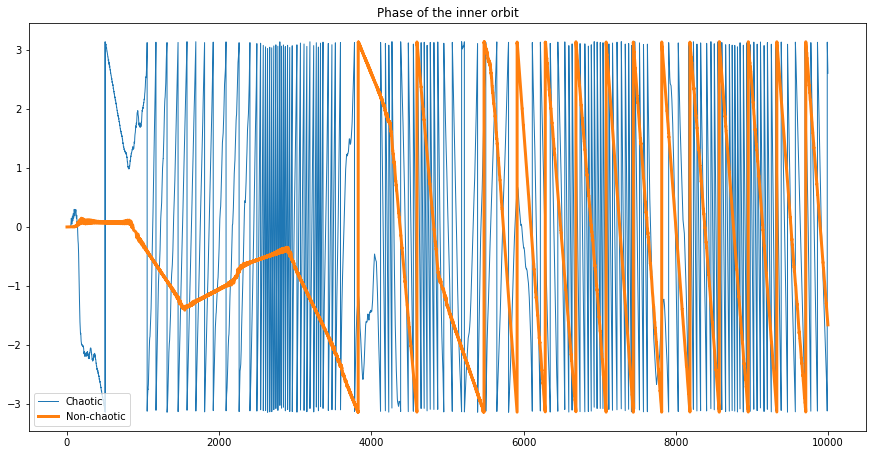

In [4]:
t = np.genfromtxt('Chaos_Original.dat',usecols=(0)) 
x1 = np.genfromtxt('Chaos_Original.dat',usecols=(1)) 
x2 = np.genfromtxt('Chaos_Shadow.dat',usecols=(1)) 

Delta_Chaos = (x2 - x1 + math.pi) % (2*math.pi) - math.pi

x1 = np.genfromtxt('NoChaos_Original.dat',usecols=(1)) 
x2 = np.genfromtxt('NoChaos_Shadow.dat',usecols=(1)) 

Delta_NoChaos = (x2 - x1 + math.pi) % (2*math.pi) - math.pi

plt.figure(figsize=(15,7.5))
plt.plot(t, Delta_Chaos, lw=1, label='Chaotic') # Look also at the log scale in time
plt.plot(t,Delta_NoChaos, lw=3, label='Non-chaotic') # Look also at the log scale in time
plt.legend(loc='best')
plt.title('Phase of the inner orbit')

Plot also, both for quasi-periodic and chaotic orbits: 
+ The difference in the semi-major axes 
+ The difference in the eccentricities
+ The difference in the arguments of periastron 

Text(0.5, 1.0, 'Eccentricity')

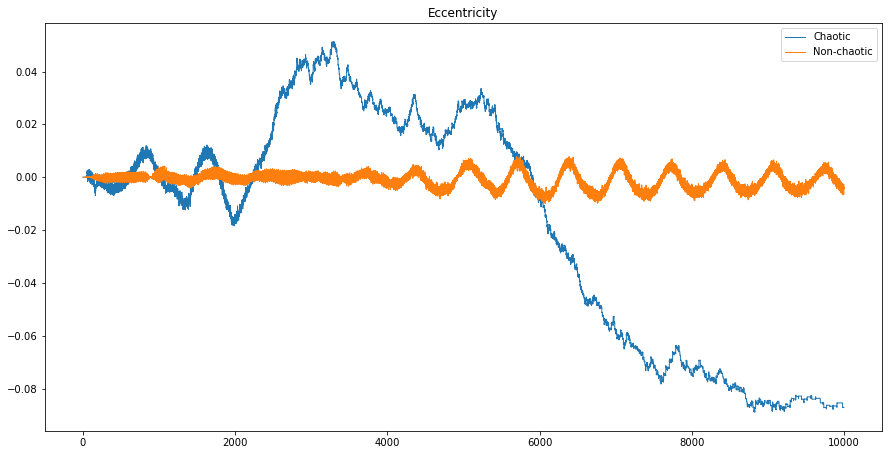

In [5]:
t = np.genfromtxt('Chaos_Original.dat',usecols=(0)) 
x1 = np.genfromtxt('Chaos_Original.dat',usecols=(2)) 
x2 = np.genfromtxt('Chaos_Shadow.dat',usecols=(2)) 

Delta_Chaos = (x2 - x1 + math.pi) % (2*math.pi) - math.pi

x1 = np.genfromtxt('NoChaos_Original.dat',usecols=(2)) 
x2 = np.genfromtxt('NoChaos_Shadow.dat',usecols=(2)) 

Delta_NoChaos = (x2 - x1 + math.pi) % (2*math.pi) - math.pi

plt.figure(figsize=(15,7.5))
plt.plot(t, Delta_Chaos, lw=1, label='Chaotic') # Look also at the log scale in time
plt.plot(t,Delta_NoChaos, lw=1, label='Non-chaotic') # Look also at the log scale in time
plt.legend(loc='best')
plt.title('Eccentricity')

Text(0.5, 1.0, 'Semi-major axis')

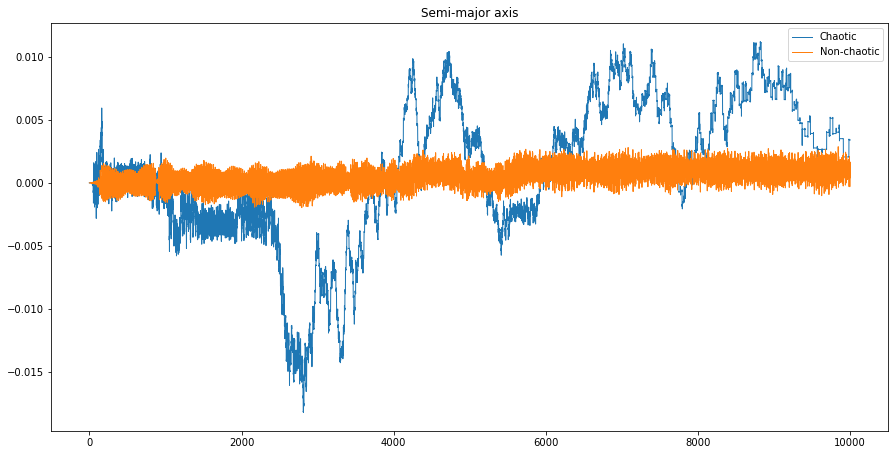

In [6]:
t = np.genfromtxt('Chaos_Original.dat',usecols=(0)) 
x1 = np.genfromtxt('Chaos_Original.dat',usecols=(3)) 
x2 = np.genfromtxt('Chaos_Shadow.dat',usecols=(3)) 

Delta_Chaos = (x2 - x1 + math.pi) % (2*math.pi) - math.pi

x1 = np.genfromtxt('NoChaos_Original.dat',usecols=(3)) 
x2 = np.genfromtxt('NoChaos_Shadow.dat',usecols=(3)) 

Delta_NoChaos = (x2 - x1 + math.pi) % (2*math.pi) - math.pi

plt.figure(figsize=(15,7.5))
plt.plot(t, Delta_Chaos, lw=1, label='Chaotic') # Look also at the log scale in time
plt.plot(t,Delta_NoChaos, lw=1, label='Non-chaotic') # Look also at the log scale in time
plt.legend(loc='best')
plt.title('Semi-major axis')

Text(0.5, 1.0, 'Argument of periastron')

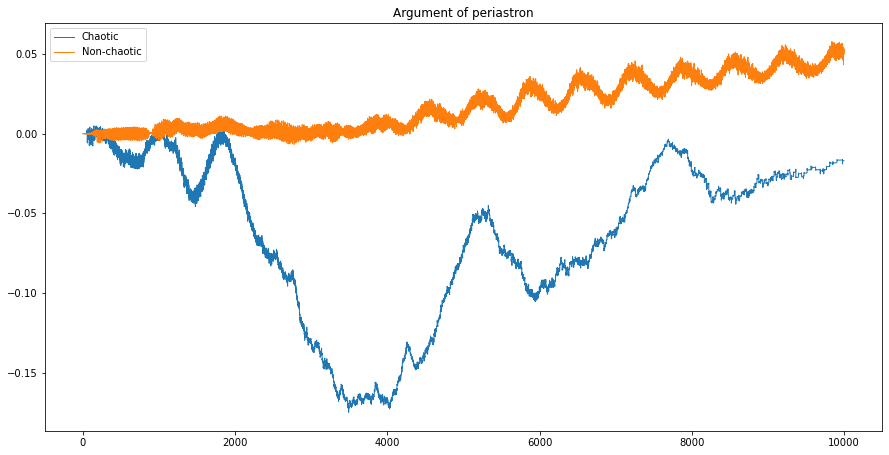

In [7]:
t = np.genfromtxt('Chaos_Original.dat',usecols=(0)) 
x1 = np.genfromtxt('Chaos_Original.dat',usecols=(4)) 
x2 = np.genfromtxt('Chaos_Shadow.dat',usecols=(4)) 

Delta_Chaos = (x2 - x1 + math.pi) % (2*math.pi) - math.pi

x1 = np.genfromtxt('NoChaos_Original.dat',usecols=(4)) 
x2 = np.genfromtxt('NoChaos_Shadow.dat',usecols=(4)) 

Delta_NoChaos = (x2 - x1 + math.pi) % (2*math.pi) - math.pi

plt.figure(figsize=(15,7.5))
plt.plot(t, Delta_Chaos, lw=1, label='Chaotic') # Look also at the log scale in time
plt.plot(t,Delta_NoChaos, lw=1, label='Non-chaotic') # Look also at the log scale in time
plt.legend(loc='best')
plt.title('Argument of periastron')

## The Lyapunov maximal exponent

Above, you put in evidence the difference of behaviour between chaotic and quasi-periodic orbits. 

This was done by integrating the original system and a shadow one, initially very similar but differing from the former by a tiny shift only. 

The quasi-periodic doublet of systems diverges LINEARLY with time, while the chaotic doublet of integrations diverges EXPONENTIALLY. 

The Lyapunov exponent is a quantity that specifies this exponential divergence of nearby orbits. From a definition of distance between 2 systems, the maximal Lyapunov exponent simply writes as: 

$$\lim_{t->\infty} \delta (t) = e^{t\sigma}\delta (0)$$

Where $\delta$ is the distance between two nearby trajectories and $\sigma$ is the maximal Lyapunov exponent. Therefore, quasi-periodic orbits have $\sigma$ = 0, while for chaotic orbits $\sigma$ > 0. This exponent is equivalent to a characterization of the system's response to a perturbation. Because of this difference in behaviour between chaotic and quasi-periodic orbits with respect to a perturbation, the Lyapunov maximal exponent can be used as a chaos indicator. 

For more details, I refer to the lecture notes from the exercises session nb 2. 

+++++++++++++++++++++++++++++++++++++++++++++

From these considerations, it is possible to build a simple implementation of the maximal Lyapunov exponent that serves as a chaos indicator. In the following, you are asked to do that. 

+ Define a distance between two trajectories. What would you choose? 
+ Implement the formula written above and compute the evolution of the quantity Distance(t) / Distance(0) 
+ Check this evolution for both chaotic and quasi-periodic orits 